# Import the Libraries

In [34]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

## Image Preprocess

In [35]:
# Adding the image directory
img_path = '/kaggle/input/flickr8k-sau/Flickr_Data/Images/'
images = glob(img_path + '*jpg')
len(images)

8091

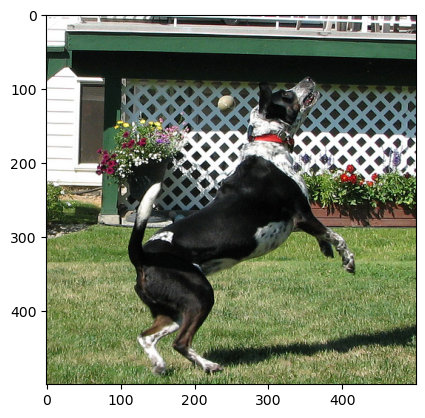

In [36]:
# Printing the image to check
import matplotlib.pyplot as plt

plt.figure()
img = cv2.imread(images[1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

## Importing the libraries for model

In [37]:
from tensorflow.keras.applications import EfficientNetB0

incept_model = EfficientNetB0(include_top = True)

In [38]:
incept_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

In [39]:
from tensorflow.keras.models import Model

inputs = incept_model.inputs
output = incept_model.layers[-2].output
demo_model = Model(inputs = inputs, outputs = output)
demo_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

In [40]:
# Adding the features of the image into a dictionary
image_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    
    img = img.reshape(1, 224, 224, 3)
    pred = demo_model.predict(img).reshape(1280,)
    
    img_name = i.split('/')[-1]
    image_features[img_name] = pred
    count+=1
    
    if count > 1499:
        break
    elif count % 50 == 0:
        print(count)

1/1 [==============================] - 0s 72ms/step
50
1/1 [==============================] - 0s 29ms/step
100
1/1 [==============================] - 0s 28ms/step
150
1/1 [==============================] - 0s 30ms/step
200
1/1 [==============================] - 0s 29ms/step
250
1/1 [==============================] - 0s 29ms/step
300
1/1 [==============================] - 0s 29ms/step
350
1/1 [==============================] - 0s 34ms/step
400
1/1 [==============================] - 0s 28ms/step
450
1/1 [==============================] - 0s 32ms/step
500
1/1 [==============================] - 0s 30ms/step
550
1/1 [==============================] - 0s 30ms/step
600
1/1 [==============================] - 0s 29ms/step
650
1/1 [==============================] - 0s 29ms/step
700
1/1 [==============================] - 0s 29ms/step
750
1/1 [==============================] - 0s 29ms/step
800
1/1 [==============================] - 0s 29ms/step
850
1/1 [==============================] - 0s 46ms/st

In [41]:
len(image_features)

1500

# Text Preprocess

In [42]:
# Adding the captions directory
caption_path = '/kaggle/input/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [43]:
# Defining the captions from reading the file in read mode and decoding the text
# in the variable captions
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [44]:
# Printing the length of captions
len(captions)

40461

In [45]:
# Adding the captions in a dictionary 
# Since there are multiple captions for a specific image
# Hence we use the dictionary
caption_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2]
        caption = i.split('\t')[1]
        if img_name in image_features:
            if img_name not in caption_dict:
                caption_dict[img_name] = [caption]
            else:
                caption_dict[img_name].append(caption)
    except:
        pass

In [46]:
len(caption_dict)

1500

# Visualize Images with Captions

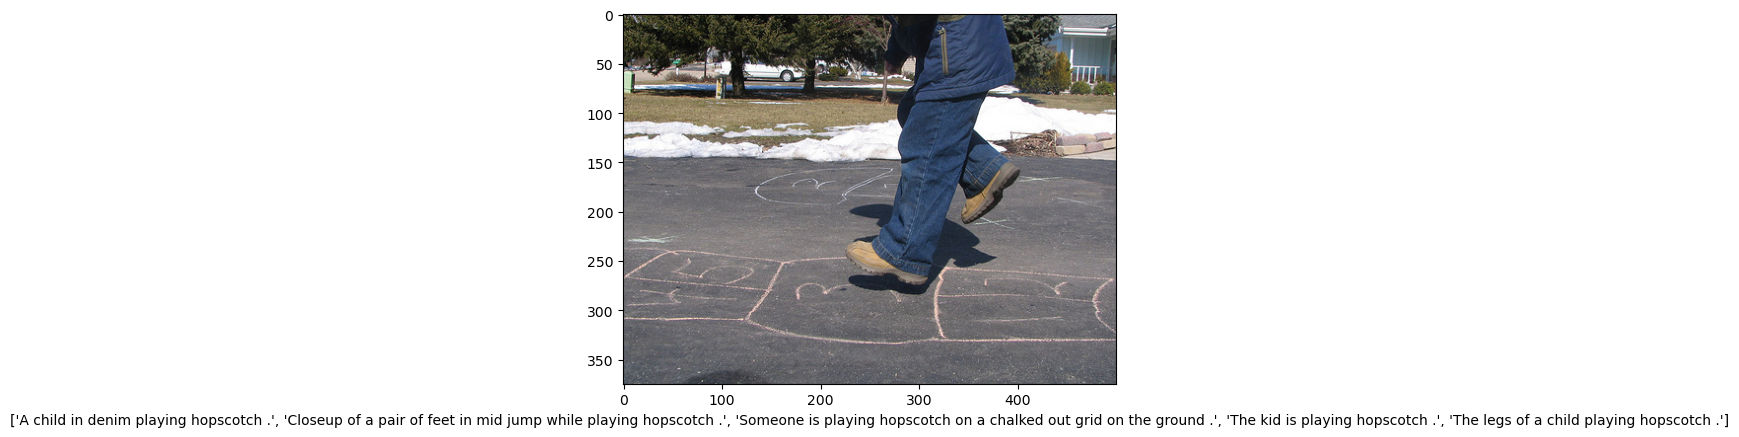

In [47]:
# Printing the captions along with the image
import matplotlib.pyplot as plt

plt.figure()
img_name = images[2]
img = cv2.imread(img_name)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.xlabel(caption_dict[img_name.split('/')[-1]])
plt.imshow(img)

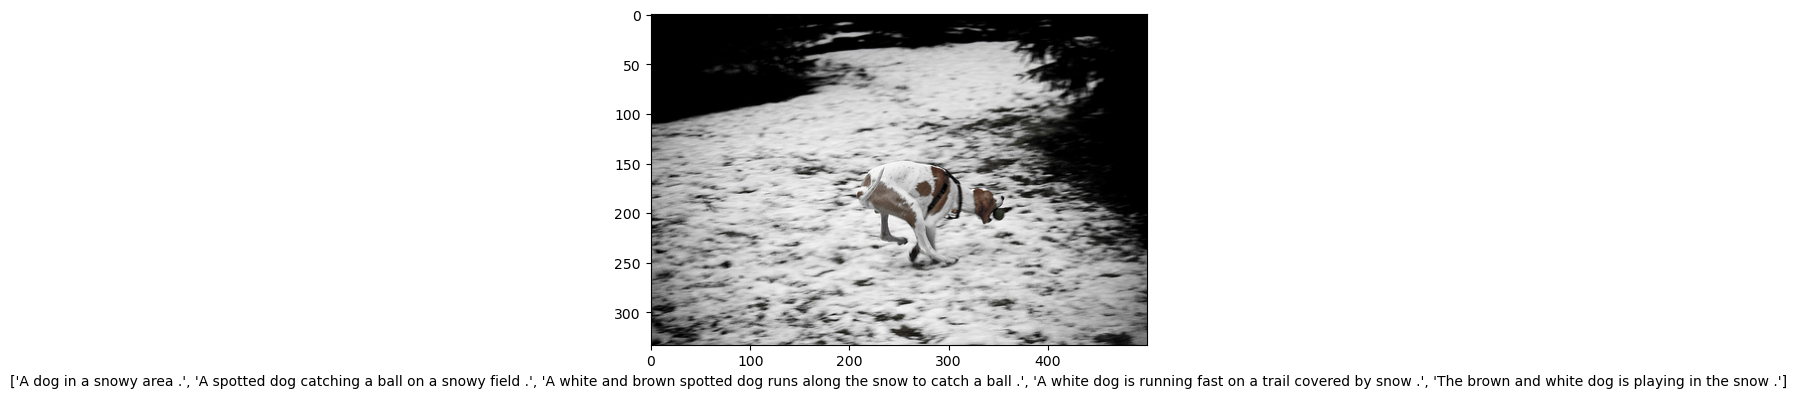

In [48]:
import matplotlib.pyplot as plt

for k in image_features.keys():
    plt.figure()
    
    img_name = '/kaggle/input/flickr8k-sau/Flickr_Data/Images/' + k
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(caption_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [49]:
# Preprocess the captions before using
def preprocessing(txt):
    modified = txt.lower()
    modified = 'start_seq' + modified + 'end_seq'
    return modified

# The preprocessing is done in such a way that the captions will be of the order
# start - caption - end

In [50]:
for k,v in caption_dict.items():
    for vv in v:
        caption_dict[k][v.index(vv)] = preprocessing(vv)

In [86]:
for k,v in caption_dict.items():
    for vv in v:
        print(vv)

[4580, 2, 3, 4, 5, 6, 7, 5, 8, 9, 10, 11, 12, 13, 14, 15, 5, 10, 16, 4580]
[4580, 2, 3, 18, 19, 5, 8, 9, 10, 20, 11, 12, 4580]
[4580, 21, 3, 5, 22, 23, 24, 13, 25, 5, 8, 9, 10, 26, 27, 13, 10, 12, 28, 29, 4580]
[4580, 18, 10, 3, 13, 31, 19, 5, 8, 9, 10, 12, 32, 4580]
[4580, 3, 13, 31, 32, 34, 5, 22, 23, 4580]
[4580, 35, 36, 10, 37, 5, 22, 38, 4580]
[4580, 35, 18, 36, 39, 22, 40, 38, 9, 10, 41, 4580]
[4580, 42, 5, 22, 43, 36, 10, 37, 5, 22, 38, 4580]
[4580, 42, 44, 28, 10, 40, 45, 4580]
[4580, 47, 48, 38, 49, 4580]
[4580, 50, 51, 9, 52, 53, 26, 54, 55, 28, 22, 56, 4580]
[4580, 54, 48, 57, 10, 58, 28, 10, 59, 60, 56, 4580]
[4580, 54, 61, 5, 22, 60, 62, 22, 56, 4580]
[4580, 54, 61, 63, 28, 10, 56, 4580]
[4580, 20, 64, 54, 55, 65, 10, 66, 56, 4580]
[4580, 67, 18, 68, 69, 70, 28, 22, 38, 4580]
[4580, 47, 48, 71, 72, 73, 74, 38, 49, 67, 28, 10, 43, 4, 45, 4580]
[4580, 47, 75, 70, 10, 76, 38, 49, 77, 28, 74, 78, 79, 4580]
[4580, 47, 81, 44, 28, 74, 38, 81, 82, 83, 84, 4, 13, 10, 76, 85, 4580]

# Create Vocabulary

In [51]:
count_words = {}
for k, vv in caption_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:
                count_words[word] = 0
            else:
                count_words[word] += 1

In [52]:
len(count_words)

4580

In [54]:
THRESHOLD = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESHOLD:
        new_dict[k] = count
        count += 1

In [55]:
len(new_dict)

4580

In [56]:
new_dict['<OUT>'] = len(new_dict)

In [57]:
captions_backup = caption_dict.copy()

In [58]:
caption_dict = captions_backup.copy()

In [59]:
for k, vv in caption_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])
                
        caption_dict[k][vv.index(v)] = encoded

In [60]:
caption_dict

{'1002674143_1b742ab4b8.jpg': [[4580,
   2,
   3,
   4,
   5,
   6,
   7,
   5,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   5,
   10,
   16,
   4580],
  [4580, 2, 3, 18, 19, 5, 8, 9, 10, 20, 11, 12, 4580],
  [4580,
   21,
   3,
   5,
   22,
   23,
   24,
   13,
   25,
   5,
   8,
   9,
   10,
   26,
   27,
   13,
   10,
   12,
   28,
   29,
   4580],
  [4580, 18, 10, 3, 13, 31, 19, 5, 8, 9, 10, 12, 32, 4580],
  [4580, 3, 13, 31, 32, 34, 5, 22, 23, 4580]],
 '102351840_323e3de834.jpg': [[4580, 35, 36, 10, 37, 5, 22, 38, 4580],
  [4580, 35, 18, 36, 39, 22, 40, 38, 9, 10, 41, 4580],
  [4580, 42, 5, 22, 43, 36, 10, 37, 5, 22, 38, 4580],
  [4580, 42, 44, 28, 10, 40, 45, 4580],
  [4580, 47, 48, 38, 49, 4580]],
 '1024138940_f1fefbdce1.jpg': [[4580,
   50,
   51,
   9,
   52,
   53,
   26,
   54,
   55,
   28,
   22,
   56,
   4580],
  [4580, 54, 48, 57, 10, 58, 28, 10, 59, 60, 56, 4580],
  [4580, 54, 61, 5, 22, 60, 62, 22, 56, 4580],
  [4580, 54, 61, 63, 28, 10, 56, 4580],
  [4580

## Build Generator Function

In [66]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [67]:
MAX_LEN = 0
for k, vv in caption_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[4580, 2, 3, 4, 5, 6, 7, 5, 8, 9, 10, 11, 12, 13, 14, 15, 5, 10, 16, 4580]
[4580, 21, 3, 5, 22, 23, 24, 13, 25, 5, 8, 9, 10, 26, 27, 13, 10, 12, 28, 29, 4580]
[4580, 185, 197, 5, 10, 76, 198, 53, 76, 199, 200, 10, 52, 201, 122, 10, 40, 45, 53, 202, 203, 4580]
[4580, 135, 5, 22, 76, 123, 18, 753, 10, 746, 747, 497, 10, 130, 279, 22, 135, 5, 22, 256, 402, 754, 72, 661, 750, 94, 4580]
[4580, 127, 159, 183, 48, 5, 128, 53, 26, 1128, 53, 1129, 333, 296, 5, 10, 1130, 81, 337, 48, 68, 1131, 294, 10, 35, 1132, 5, 1128, 53, 10, 4580]
[4580, 194, 26, 212, 18, 34, 22, 161, 81, 503, 26, 212, 13, 10, 128, 2460, 28, 467, 313, 18, 153, 83, 10, 668, 495, 161, 333, 151, 606, 294, 10, 560, 1191, 4580]


In [68]:
MAX_LEN

34

In [69]:
caption_dict

{'1002674143_1b742ab4b8.jpg': [[4580,
   2,
   3,
   4,
   5,
   6,
   7,
   5,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   5,
   10,
   16,
   4580],
  [4580, 2, 3, 18, 19, 5, 8, 9, 10, 20, 11, 12, 4580],
  [4580,
   21,
   3,
   5,
   22,
   23,
   24,
   13,
   25,
   5,
   8,
   9,
   10,
   26,
   27,
   13,
   10,
   12,
   28,
   29,
   4580],
  [4580, 18, 10, 3, 13, 31, 19, 5, 8, 9, 10, 12, 32, 4580],
  [4580, 3, 13, 31, 32, 34, 5, 22, 23, 4580]],
 '102351840_323e3de834.jpg': [[4580, 35, 36, 10, 37, 5, 22, 38, 4580],
  [4580, 35, 18, 36, 39, 22, 40, 38, 9, 10, 41, 4580],
  [4580, 42, 5, 22, 43, 36, 10, 37, 5, 22, 38, 4580],
  [4580, 42, 44, 28, 10, 40, 45, 4580],
  [4580, 47, 48, 38, 49, 4580]],
 '1024138940_f1fefbdce1.jpg': [[4580,
   50,
   51,
   9,
   52,
   53,
   26,
   54,
   55,
   28,
   22,
   56,
   4580],
  [4580, 54, 48, 57, 10, 58, 28, 10, 59, 60, 56, 4580],
  [4580, 54, 61, 5, 22, 60, 62, 22, 56, 4580],
  [4580, 54, 61, 63, 28, 10, 56, 4580],
  [4580

In [70]:
batch_size = 5000
vocab_size = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])
                
                in_seq = [v[:i]]
                out_seq = v[i]
                
                in_seq = pad_sequences(in_seq, maxlen = MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                
                y_in.append(in_seq)
                y_out.append(out_seq)
                
    return X, y_in, y_out

In [71]:
X, y_in, y_out = generator(image_features, caption_dict)

In [72]:
len(X), len(y_in), len(y_out)

(81528, 81528, 81528)

In [74]:
y_in[2]

array([4580,    2,    3,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

# MODEL

In [77]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout
from tensorflow.keras.layers import Add
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Flatten, Convolution2D, TimeDistributed, Bidirectional, Activation, RepeatVector, Concatenate

In [81]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

img_model = Sequential()

img_model.add(Dense(embedding_size, input_shape=(1280,), activation='relu'))
img_model.add(RepeatVector(max_len))

img_model.summary()

lang_model = Sequential()

lang_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
lang_model.add(LSTM(256, return_sequences=True))
lang_model.add(TimeDistributed(Dense(embedding_size)))

lang_model.summary()

concate = Concatenate()([img_model.output, lang_model.output])
x = LSTM(128, return_sequences=True)(concate)
x = LSTM(256, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)

model = Model(inputs=[img_model.input, lang_model.input], outputs=out)

model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               163968    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 34, 128)          0         
 or)                                                             
                                                                 
Total params: 163,968
Trainable params: 163,968
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 34, 128)           586368    
                                                                 
 lstm_3 (LSTM)               (None, 34, 256)           394240    
                          

In [1]:
model.fit([X, y_in], y_out, batch_size=128, epochs=50)

NameError: name 'model' is not defined